**复习：**回顾学习完第一章，我们对泰坦尼克号数据有了基本的了解，也学到了一些基本的统计方法，第二章中我们学习了数据的清理和重构，使得数据更加的易于理解；今天我们要学习的是第二章第三节：**数据可视化**，主要给大家介绍一下Python数据可视化库Matplotlib，在本章学习中，你也许会觉得数据很有趣。在打比赛的过程中，数据可视化可以让我们更好的看到每一个关键步骤的结果如何，可以用来优化方案，是一个很有用的技巧。

# 2 第二章：数据可视化

#### 开始之前，导入numpy、pandas以及matplotlib包和数据

In [53]:
# 加载所需的库
# 如果出现 ModuleNotFoundError: No module named 'xxxx'
# 你只需要在终端/cmd下 pip install xxxx 即可
#最后一行plt.plot()代码后不会将图像给画出来，还需要执行plt.show()之后，图像才会顺利的显示出来。但是由于%matplotlib inline这个魔法函数的存在，即使没有执行plt.show()这行代码，图像在这里也会显示出来，这就是%matplotl
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
#加载result.csv这个数据
text = pd.read_csv(r'result.csv')
text.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.7 如何让人一眼看懂你的数据？
《Python for Data Analysis》第九章

#### 2.7.1 任务一：跟着书本第九章，了解matplotlib，自己创建一个数据项，对其进行基本可视化

【思考】最基本的可视化图案有哪些？分别适用于那些场景？（比如折线图适合可视化某个属性值随时间变化的走势）

In [55]:
#思考回答
#这一部分需要了解可视化图案的的逻辑，知道什么样的图案可以表达什么样的信号b


#### 2.7.2 任务二：可视化展示泰坦尼克号数据集中男女中生存人数分布情况（用柱状图试试）。

Text(0.5, 1.0, 'survived_count')

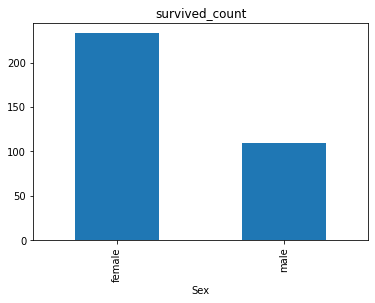

In [56]:
#代码编写

sex = text.groupby('Sex')['Survived'].sum()
sex.plot(kind='bar')
plt.title('survived_count')

【思考】计算出泰坦尼克号数据集中男女中死亡人数，并可视化展示？如何和男女生存人数可视化柱状图结合到一起？看到你的数据可视化，说说你的第一感受（比如：你一眼看出男生存活人数更多，那么性别可能会影响存活率）。

In [57]:
#思考题回答



#### 2.7.3 任务三：可视化展示泰坦尼克号数据集中男女中生存人与死亡人数的比例图（用柱状图试试）。

In [58]:
df=text.groupby(['Sex','Survived'])['Survived'].count()
df

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'survived_count')

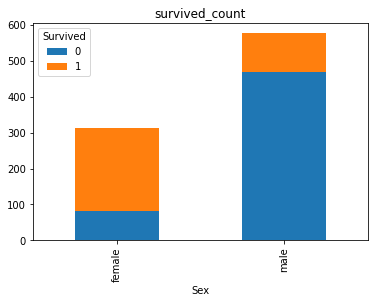

In [59]:
#代码编写
# 提示：计算男女中死亡人数 1表示生存，0表示死亡
df=text.groupby(['Sex','Survived'])['Survived'].count().unstack()#unstack函数将数据从”花括号结构“变成”表格结构“，即要将其中一层的列索引变成行索引。例
df.plot(kind='bar',stacked='True')
plt.title('survived_count')

【提示】男女这两个数据轴，存活和死亡人数按比例用柱状图表示

#### 2.7.4 任务四：可视化展示泰坦尼克号数据集中不同票价的人生存和死亡人数分布情况。（用折线图试试）（横轴是不同票价，纵轴是存活人数）

【提示】对于这种统计性质的且用折线表示的数据，你可以考虑将数据排序或者不排序来分别表示。看看你能发现什么？

In [60]:
#代码编写
# 计算不同票价中生存与死亡人数 1表示生存，0表示死亡
fare_sur = text.groupby(['Fare'])['Survived'].value_counts().sort_values(ascending=False)#降序
#value_counts()是一种查看表格某列中有多少个不同值的快捷方法，并计算每个不同值有在该列中有多少重复值
fare_sur

Fare     Survived
8.0500   0           38
7.8958   0           37
13.0000  0           26
7.7500   0           22
13.0000  1           16
                     ..
7.7417   0            1
26.2833  1            1
7.7375   1            1
26.3875  1            1
22.5250  0            1
Name: Survived, Length: 330, dtype: int64

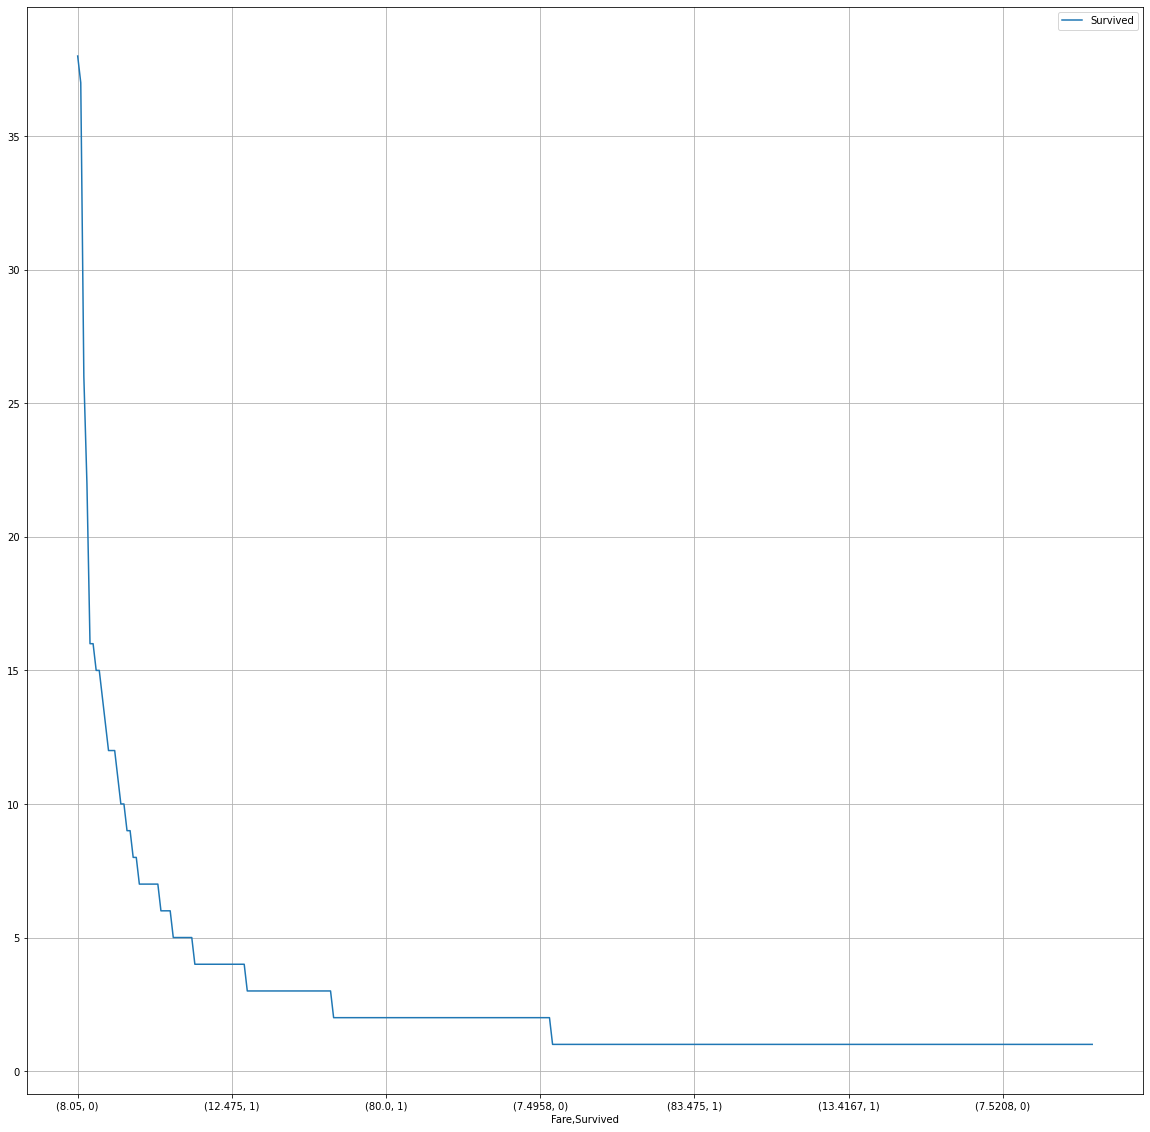

In [61]:

#代码编写,1表示生存，0表示死亡
fig = plt.figure(figsize=(20,20))#确保一定图片大小
fare_sur.plot(grid=True)#显示网格
plt.legend()#增加标签说明


#### 2.7.5 任务五：可视化展示泰坦尼克号数据集中不同仓位等级的人生存和死亡人员的分布情况。（用柱状图试试）

【思考】看到这个前面几个数据可视化，说说你的第一感受和你的总结

In [62]:
pclass_sur = text.groupby(['Pclass'])['Survived'].value_counts()
pclass_sur

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

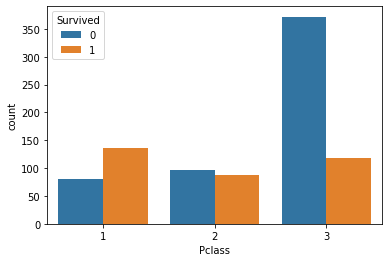

In [41]:
#思考题回答
import seaborn as sns
sns.countplot(x="Pclass", hue="Survived", data=text)
# sns.countplot() 用于类别特征的频数条形图，可以画类别特征和y值（y值特征也是类比的话）的条形图

# sns.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)

# 参数说明：

# x： x轴上的条形图，以x标签划分统计个数

# y：y轴上的条形图，以y标签划分统计个数

# hue：在x或y标签划分的同时，再以hue标签划分统计个数

# data：df或array或array列表，用于绘图的数据集，x或y缺失时，data参数为数据集，同时x或y不可缺少，必须要有其中一个

# order, hue_order：分别是对x或y的字段排序，hue的字段排序。排序的方式为列表

# orient：强制定向，v:竖直方向；h:水平方向

# palette：使用不同的调色板

# ax：画子图的时候


#多行注释ctrl+/

#### 2.7.6 任务六：可视化展示泰坦尼克号数据集中不同年龄的人生存与死亡人数分布情况。(不限表达方式)

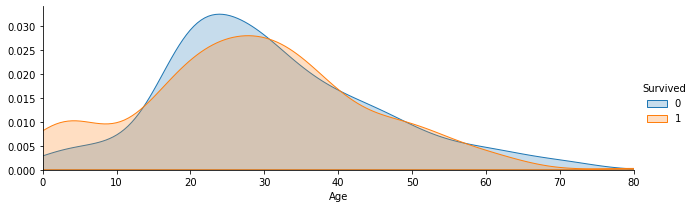

In [48]:
#代码编写
facet = sns.FacetGrid(text, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, text['Age'].max()))
facet.add_legend()

#  FacetGrid的用法举例子：  https://blog.csdn.net/weixin_42398658/article/details/82960379
# 首先调用FacetGrid函数，第一个参数必须是DataFrame格式；第二个参数hue为第一个参数中的列名，官方文档中解释为“It can also represent levels of a third varaible with the ``hue``parameter”，即“多个y轴”这一功能通过hue实现；第三个参数aspect为一个比值，用于调整x轴的单位长度。这个函数会返回一个FacetGrid对象，包含数据集和用于画图的变量。对于这些变量的使用，需要函数FacetGrid.map。

# 正好，下面就用这个函数了，官方文档如下描述“Apply a plotting function to each facet's subset of the data”，将函数图像应用于数据的每一个子集。第一个参数为sns.kdeplot。wdnmd，这又是个啥？

# 这个函数就是用来实现“密度图”的。kde全称kernel density estimation，核密度估计，简而言之，就是根据离散采样估计整体的概率分布。参见该链接。对于本例，“某一年龄中Survived中取值为0或1的个数”就是一个采样，对于全部年龄，都会有一个对应的采样。我们可以想象一下这些采样画成直方图，应该就是类似上面乱七八糟的样子，但是有个问题：这个直方图的纵轴的值与“该年龄生还的概率”有直接关系，意思是这个值可能为1，但是这没啥用——我们真正想要的是“某段年龄生还的概率”，因为直方图是离散的，虽然我们一定可以得到一个值，但是由于部分值的缺失、样本数量太少等原因，直方图不能很好的反映概率。我们就需要根据直方图绘制概率密度图——我年龄在[0,max]之间，那对应我生还就有一个概率。如何求呢，就用到kde了。kde的原理有些复杂，但我们要调用就很简单了，直接sns.kdeplot即可。

# 那么第二个参数值为age就可以理解了，它就是kde需要的数据。第三个参数shade为True表示将函数图像与x轴部分变成实心的。

# 接下来的set、add、xlable、ylable用于调整图像的x轴范围、图像名称、x轴y轴名称。
# ————————————————
# 版权声明：本文为CSDN博主「一笑照夜」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
# 原文链接：https://blog.csdn.net/erwugumo/article/details/101849790/

#### 2.7.7 任务七：可视化展示泰坦尼克号数据集中不同仓位等级的人年龄分布情况。（用折线图试试）

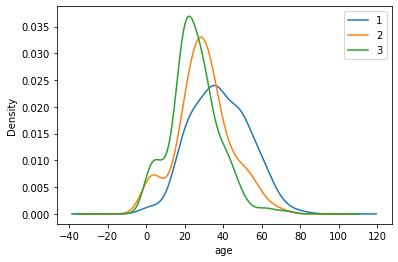

In [65]:
#代码编写
text.Age[text.Pclass == 1].plot(kind='kde')#密度图
text.Age[text.Pclass == 2].plot(kind='kde')
text.Age[text.Pclass == 3].plot(kind='kde')
plt.xlabel("age")
plt.legend((1,2,3),loc="best")#loc=best调整标签显示的位置,这里要不要都行


【思考】上面所有可视化的例子做一个总体的分析，你看看你能不能有自己发现

In [ ]:
#思考题回答



【总结】到这里，我们的可视化就告一段落啦，如果你对数据可视化极其感兴趣，你还可以了解一下其他可视化模块，如：pyecharts，bokeh等。

如果你在工作中使用数据可视化，你必须知道数据可视化最大的作用不是炫酷，而是最快最直观的理解数据要表达什么，你觉得呢？